###DEEP LEARNING MODEL TO PREDICT DIFFERENT CIFAR10 IMAGES.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sys
import os


In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

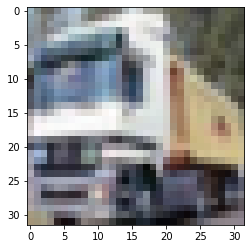

In [ ]:
plt.imshow(X_train[1])

In [ ]:
###REshaping
y_train=y_train.reshape(-1, )
y_train


array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
len(y_classes)

10

In [ ]:
def showImage(x, y , index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[y[index]])





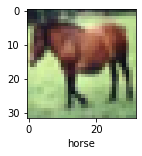

In [ ]:
showImage(X_train, y_train, 7)

In [ ]:
###Normalizing the pixels

In [ ]:
X_train = X_train/ 255.0
X_test=X_test/255.0

In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
####BUILDING CNN MODEL

from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split


In [ ]:
m1=Sequential()
m1.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
m1.add(MaxPooling2D(pool_size=(2,2)))
m1.add(Conv2D(64,(4,4),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(34,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics = ['accuracy'])





In [ ]:
h1=m1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 81s 52ms/step - loss: 2.4287 - accuracy: 0.1001 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 80s 51ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 77s 49ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 79s 50ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 81s 52ms/step - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3026 -

In [ ]:
r1=pd.DataFrame(h1.history)
r1['Epoch']=h1.epoch
r1.shape

(10, 5)

In [ ]:
###Loss vs Val_Loss

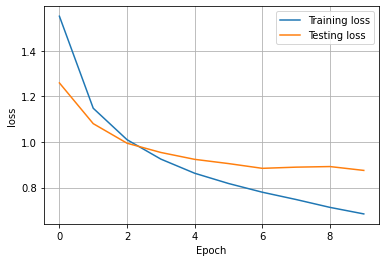

In [ ]:
plt.plot(r1['Epoch'],r1['loss'],label='Training loss')
plt.plot(r1['Epoch'],r1['val_loss'],label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()


In [ ]:
### Accuracy vs Val_Loss

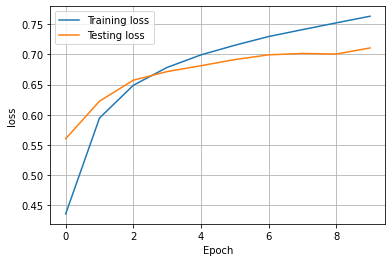

In [ ]:
plt.plot(r1['Epoch'],r1['accuracy'],label='Training loss')
plt.plot(r1['Epoch'],r1['val_accuracy'],label='Testing loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#### PREDICTION ON DATA


In [ ]:
ypred=m1.predict(X_test)
print(ypred[0])
print(sum(ypred[0]))
print(sum(ypred[465]))

[9.84059297e-04 1.12239206e-04 7.75187917e-04 7.88244784e-01
 9.13043623e-04 7.91113675e-02 9.10990965e-03 1.41402488e-04
 1.19767442e-01 8.40569090e-04]
1.0000000049549271
0.99999993859592


In [ ]:
y_test[:10]


array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [ ]:
ypred_m1=[np.argmax(i) for i in ypred]
print(ypred_m1)



[3, 8, 8, 0, 4, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 6, 5, 7, 8, 6, 7, 0, 4, 9, 4, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 3, 7, 9, 9, 5, 4, 6, 3, 6, 0, 9, 3, 9, 7, 6, 9, 8, 6, 3, 8, 8, 7, 3, 5, 3, 7, 5, 6, 3, 6, 2, 1, 0, 5, 9, 0, 3, 8, 8, 0, 2, 7, 3, 3, 8, 8, 1, 1, 7, 2, 7, 0, 0, 9, 9, 0, 4, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 8, 6, 8, 7, 4, 0, 2, 2, 9, 7, 0, 4, 3, 5, 8, 7, 1, 2, 8, 0, 0, 3, 3, 0, 4, 1, 8, 9, 1, 2, 9, 7, 2, 8, 3, 5, 6, 5, 8, 7, 6, 5, 5, 3, 0, 9, 6, 0, 0, 6, 2, 9, 2, 4, 2, 1, 6, 6, 0, 7, 8, 6, 6, 0, 9, 9, 9, 8, 9, 9, 3, 7, 3, 0, 9, 5, 2, 6, 0, 8, 6, 3, 3, 8, 5, 8, 0, 1, 7, 4, 8, 8, 7, 8, 3, 0, 8, 7, 1, 3, 8, 5, 7, 9, 6, 0, 5, 9, 8, 0, 7, 9, 0, 7, 7, 7, 9, 3, 4, 9, 4, 2, 3, 6, 3, 1, 5, 8, 8, 0, 4, 0, 5, 3, 1, 9, 8, 9, 0, 6, 1, 8, 2, 0, 5, 3, 9, 9, 6, 0, 6, 0, 8, 1, 8, 9, 8, 3, 0, 8, 8, 4, 7, 0, 2, 3, 6, 3, 8, 2, 0, 7, 4, 3, 9, 0, 6, 1, 9, 9, 1, 8, 7, 9, 1, 2, 6, 1, 3, 2, 6, 0, 0, 6, 6, 6, 2, 2, 6, 1, 9, 2, 9, 4, 8, 6, 8, 0, 3, 0, 7, 7, 5, 5, 3, 3, 2, 2, 4, 4, 7, 5, 4, 6, 1, 9, 4, 

In [ ]:
###CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
cm=confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[792  15  31  10   9   5  10  16  71  41]
 [ 19 801   1   8   3   4   8   3  39 114]
 [ 87  10 537  63  96  50  76  36  23  22]
 [ 36  12  61 542  68 100  80  37  27  37]
 [ 34   6  70  60 654  14  64  77  16   5]
 [ 15   4  55 220  39 532  50  54  17  14]
 [  6   4  48  47  38  11 817   4   8  17]
 [ 24   7  33  37  54  39  10 771   9  16]
 [ 72  22  10  11   4   4   8   7 838  24]
 [ 40  60   8  13   2   2  12   7  33 823]]
              precision    recall  f1-score   support

           0       0.70      0.79      0.75      1000
           1       0.85      0.80      0.83      1000
           2       0.63      0.54      0.58      1000
           3       0.54      0.54      0.54      1000
           4       0.68      0.65      0.66      1000
           5       0.70      0.53      0.60      1000
           6       0.72      0.82      0.77      1000
           7       0.76      0.77      0.77      1000
           8       0.78      0.84      0.81      1000
           9       0.74     